In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
#os for joining path of file

## cv2  is reading images files and convert it to array 
## glob is used for selecting path using regex
here we have created two list onr for images and other of lables 
#### we are looping in img floder for train data and reading path using glob and converting it to array using cv2 
and storing data in both list 

In [2]:
#Load Images
import cv2
from glob import glob
def load_images():
    train_images = [] 
    train_labels = []
    # Loop over the training folder 
    for classed in range(10):
        print('Loading directory c{}'.format(classed))
        files = glob(os.path.join('Downloads','state-farm-distracted-driver-detection','imgs', 'train', 'c' + str(classed), '*.jpg'))
        for file in files:
            img = cv2.imread(file)
            train_images.append(cv2.resize(img, (225,225)))
            train_labels.append(classed)  
    print(len(train_images))        
    return train_images, train_labels 


images, labels = load_images()

#Load data file
data_file = pd.read_csv("driver_imgs_list.csv")
data_file

Loading directory c0
Loading directory c1
Loading directory c2
Loading directory c3
Loading directory c4
Loading directory c5
Loading directory c6
Loading directory c7
Loading directory c8
Loading directory c9
22424


,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


## Here general we are spliting data in train_test_split
### and one hotencoding with labels

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

x_train, x_test, y_train, y_test =  train_test_split(images,labels, test_size = 0.25)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

x_train, y_train = np.asarray(x_train), np.asarray(y_train)
x_test, y_test = np.asarray(x_test), np.asarray(y_test)
print(x_train.shape, y_train.shape)

(16818, 225, 225, 3) (16818, 10)


# Exploring the dataset

In [4]:
print('Unique drivers: ', data_file['subject'].nunique())
print('Number of images per driver')
print(data_file['subject'].value_counts())

Unique drivers:  26
Number of images per driver
p021    1237
p022    1233
p024    1226
p026    1196
p016    1078
p066    1034
p049    1011
p051     920
p014     876
p015     875
p035     848
p047     835
p012     823
p081     823
p064     820
p075     814
p061     809
p056     794
p050     790
p052     740
p002     725
p045     724
p039     651
p041     605
p042     591
p072     346
Name: subject, dtype: int64


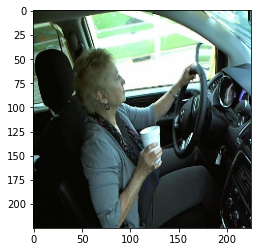

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [5]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(x_train[1000], cv2.COLOR_BGR2RGB))
plt.show()
print(y_train[1000])

In [ ]:
## implementing CNN model for Image processing

# CNN Model

#### here we have 3 layer (first input 2 hidden layer)
## activation function is used is elu, model is used is Sequential

In [6]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop
import keras
from keras.callbacks import EarlyStopping


model = Sequential()


size = 16
#starting size with 32
model.add(Conv2D(size*2, (3, 3), padding='same', input_shape=(225,225,3)))
model.add(Activation('elu'))
model.add(Conv2D(size*2, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#starting size with 32*2 = 64

model.add(Conv2D(size*4, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(size*4, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#starting size with 32*2*4 = 128

model.add(Conv2D(size*8, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(size*8, (3, 3)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(size*16))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))#softmax is used to get maximun value in a row

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [7]:
model.summary()
#these will print summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 225, 225, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 225, 225, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 223, 223, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 64)      1

In [ ]:
## we can see that total number of parameter to be traioned is 22,441,002

In [ ]:
history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=20, batch_size=25, callbacks = EarlyStopping(monitor='val_loss', mode='min', patience=2))

## fitting data

Epoch 1/20
 14/673 [..............................] - ETA: 1:04:29 - loss: 108.7183 - accuracy: 0.0938

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=10)
print(acc)


## accuracy of our model is 0.9894755482673645